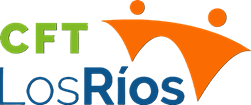
# Taller de Analítica
### Clase 4: Repaso de Algoritmos de Predicción con GridSearchCV
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

### En esta clase reforzaremos y practicaremos los distintos algoritmos de Machine Learning utilizando la libreria Scikit-Learn y GridSearchCV, que permite elaborar algoritmos predictivos y establecer la busqueda de parametros con el objetivo de mejorar las metricas y el rendimiento de los modelos.

In [ ]:
import pandas as pd 
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('housing.csv')

data.head()

In [ ]:
data.shape

In [ ]:
data.describe()

In [ ]:
data.dtypes

In [ ]:
data.isnull().sum()

### Imputamos los valores faltantes mediante el promedio

In [ ]:
data["total_bedrooms"] = data["total_bedrooms"].fillna(data["total_bedrooms"].mean())

In [ ]:
data.isnull().sum()

### Transformamos la columna 'ocean_proximity   a numerica usando la funcion .map

In [ ]:
data['ocean_proximity'] = data['ocean_proximity'].map({
    '<1H OCEAN': 0,
    'INLAND': 1,
    'ISLAND': 2,
    'NEAR BAY': 3,
    'NEAR OCEAN': 4
})


In [ ]:
# Comprobamos que no existan valores NaN
data.isnull().sum()

### Separamos las variables independientes y dependiente

In [ ]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

### Separamos los datos en 80% para entrenar y 20% para testear

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

### Normalizamos los datos para asegurar un nivel importancia similar en los datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

## Aplicacion de algoritmos de prediccion utilizando las librerias Sickit-Learn y GridSearchCV

## Arbol de Decision

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
dt_reg = DecisionTreeRegressor()
params_dt_reg = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15], # Profundidad del árbol
    'min_samples_split': [2, 5, 10], # Mínimo de samples o muestras
    'min_samples_leaf': [1, 2, 4] # Número de hojas por árbol
}

# Grid Search
grid_dt_reg = GridSearchCV(dt_reg, params_dt_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_dt_reg.fit(X_train, y_train)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Definición del modelo y parámetros para Grid Search
rf_reg = RandomForestRegressor()
params_rf_reg = {
    'n_estimators': [5, 10, 20], # Estimadores
    'max_depth': [None, 5, 10, 15], # Profundiad de los árboles
    'min_samples_split': [2, 5, 10], # Mínimo de muestras
    'min_samples_leaf': [1, 2, 4], # Mínimo de hojas del árbol
    'bootstrap': [True, False]
}

# Grid Search
grid_rf_reg = GridSearchCV(rf_reg, params_rf_reg, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_reg.fit(X_train, y_train)


## XGBoost

In [ ]:
import xgboost as xgb

xgboost_reg = xgb.XGBRegressor()
params_xgb_reg = {
    'n_estimators': [5, 10], # Estimadores
    'max_depth': [2, 4, 6], # Profundidad
    'learning_rate': [0.01, 0.1], # Tasa de aprendizaje
    'subsample': [0.5, 0.75, 1.0], # sub muestras
    'colsample_bytree': [0.5, 1.0],
    'gamma': [0, 0.1]
}

# Grid Search
grid_xgb_reg = GridSearchCV(xgboost_reg, params_xgb_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb_reg.fit(X_train, y_train)


## Perceptrón Multicapa

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp_reg = MLPRegressor(max_iter=500)  # Numero de iteraciones

params_mlp_reg = {
    'hidden_layer_sizes': [(100,), (50, 50), (100, 50)], # Neuronas
    'activation': ['relu', 'tanh'], 
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],  
    'learning_rate_init': [0.001, 0.0001, 0,1], # Tasa de aprendizaje
    'learning_rate': ['constant', 'adaptive']  # Estimadores de la tasa de aprendizaje
}

grid_mlp_reg = GridSearchCV(mlp_reg, params_mlp_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp_reg.fit(X_train_scaled, y_train)


## Support Vector Machine

In [ ]:
from sklearn.svm import SVR

# Definición del modelo y parámetros para Grid Search
svr_reg = SVR()
params_svr_reg = {
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 1],
    'epsilon': [0.01, 0.1]
}

# Grid Search
grid_svr_reg = GridSearchCV(svr_reg, params_svr_reg, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_svr_reg.fit(X_train, y_train)


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Definición del modelo y parámetros para Grid Search
knn_reg = KNeighborsRegressor()
params_knn_reg = {
    'n_neighbors': range(1, 3),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [2, 5, 7],
    'p': [1, 2]
}

# Grid Search
grid_knn_reg = GridSearchCV(knn_reg, params_knn_reg, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn_reg.fit(X_train, y_train)


## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
elastic_net_reg = ElasticNet()
params_elastic_net = {
    'alpha': [0.1, 1, 10, 100],  # Combina la importancia de los términos de regularización L1 y L2
    'l1_ratio': [0.1, 0.5, 0.9],  # Mezcla entre la regresión Lasso y Ridge (0 = Ridge, 1 = Lasso)
    'max_iter': [100, 500],  # Número máximo de iteraciones
    'tol': [0.0001, 0.001]  # Tolerancia para el criterio de parada
}

# Grid Search
grid_elastic_net_reg = GridSearchCV(elastic_net_reg, params_elastic_net, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_elastic_net_reg.fit(X_train, y_train)


## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
gb_reg = GradientBoostingRegressor()
params_gb = {
    'n_estimators': [5, 10, 15],  # Número de estimadores
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5],  # Profundidad máxima de los estimadores 
    'min_samples_split': [2, 4],  # Número mínimo de muestras para un sample
    'min_samples_leaf': [1, 2],  # Número mínimo de muestras requeridas en un nodo hoja
    'max_features': ['sqrt', 'log2', None]  # Número de características para dividir los nodos
}
grid_gb_reg = GridSearchCV(gb_reg, params_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_gb_reg.fit(X_train, y_train)

## Lasso y Lars

In [ ]:
from sklearn.linear_model import LassoLars
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
lasso_lars = LassoLars()
params_lasso_lars = {
    'alpha': [0.01, 0.1, 1, 10],  # Parámetro de penalización
    'max_iter': [10, 50, 100],  # Número máximo de iteraciones
    'eps': [1e-4, 1e-8, 1e-12]  # Épsilon para el criterio de convergencia
}

grid_lasso_lars = GridSearchCV(lasso_lars, params_lasso_lars, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lasso_lars.fit(X_train, y_train)

## Cat Boost

In [ ]:
#!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

catboost_reg = CatBoostRegressor(silent=True)
params_catboost = {
    'iterations': [2, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [2, 4, 6],
    'l2_leaf_reg': [1, 3, 5],
    'loss_function': ['RMSE', 'MAE']
}

grid_catboost_reg = GridSearchCV(catboost_reg, params_catboost, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_catboost_reg.fit(X_train, y_train)


## LightGBM

In [ ]:
#!pip install lightgbm

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Definición del modelo y parámetros para Grid Search
lgbm_reg = lgb.LGBMRegressor()
params_lgbm = {
    'num_leaves': [31, 62, 127],  # Número de hojas en un árbol
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'n_estimators': [5, 10, 15],  # Número de árboles a construir
    'max_depth': [-1, 5, 10],  # Profundidad máxima de los árboles
    'min_split_gain': [0.0, 0.1],  # Ganancia mínima para realizar una división
    'subsample': [0.8, 1.0],  # Submuestreo de los datos para construir los árboles
    'colsample_bytree': [0.8, 1.0]  # Submuestreo de características para construir cada árbol
}

# Grid Search
grid_lgbm_reg = GridSearchCV(lgbm_reg, params_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_lgbm_reg.fit(X_train, y_train)


## Comparacion de Metricas

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from tabulate import tabulate

# Supongamos que tienes un diccionario de modelos entrenados
# donde las claves son los nombres de los modelos y los valores son los modelos ya entrenados
models = {
    'DecisionTree': grid_dt_reg.best_estimator_,
    'RandomForest': grid_rf_reg.best_estimator_,
    'XGBoost': grid_xgb_reg.best_estimator_,
    'MLPRegressor': grid_mlp_reg.best_estimator_,
    'SVR': grid_svr_reg.best_estimator_,
    'KNeighbors': grid_knn_reg.best_estimator_,
    'ElasticNet': grid_elastic_net_reg.best_estimator_,
    'GradientBoosting': grid_gb_reg.best_estimator_,
    'CatBoost': grid_catboost_reg.best_estimator_,
    'LightGBM': grid_lgbm_reg.best_estimator_,

}

# Calculamos las metricas
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, r2])

print(tabulate(results, headers=['Modelo', 'MSE', 'R^2']))
